In [47]:
%pylab
%matplotlib inline

from math import ceil, floor, log
from fractions import gcd
from collections import OrderedDict
import datetime
import json

import mach

pyplot.rcParams['figure.figsize'] = [12, 8]

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [48]:
MEGA = 1e6
KILO = 1e3
BYTE = 8#bits

SECOND = datetime.timedelta(seconds=1)
MINUTE = datetime.timedelta(minutes=1)
WEEK = datetime.timedelta(days=7)
MONTH = datetime.timedelta(days=30)

NOW = datetime.datetime.utcnow()

DATA_RATES = [16, 64]#kbits/s

MAX_PACKET_SIZE = 2048#Bytes
DWN_HEADER = 14#Bytes
LSM_HEADER = 8#Bytes
LSM_PADDING = lambda n: 16 * (n // 16 + 1)
LSM_CIPHER = 4#Bytes

APID = {
    2: "ENG_DWN_APID_2_NUM_PACKETS(?!_)",
    5: "ENG_DWN_APID_5_NUM_PACKETS(?!_)",
    "dump": "ENG_DWN_APID_DUMP_NUM_PACKETS(?!_)"
}

FRAME_LENGTH = [64800, 16200]

CODE_RATE = OrderedDict([
    ((1, 4), [16008, 3072]),
    ((1, 3), [21408, 5232]),
    ((2, 5), [25728, 6312]),
    ((1, 2), [32208, 7032]),
    ((3, 5), [38688, 9552]),
    ((2, 3), [43040, 10632]),
    ((3, 4), [48408, 11712]),
    ((4, 5), [51648, 12432]),
    ((5, 6), [53840, 13152]),
    ((8, 9), [57472, 14232]),
    ((9, 10), [58192, 0])
])

DAC_FREQ = 135e6
SYMBOL_RATE_INC = 0x55555555
MODULATION = OrderedDict([
    ("QPSK", 4),
    ("8-PSK", 8),
    ("16-APSK", 16),
    ("32-APSK", 32)
])

SKYBOX_PREAMBLE = 36
IMAGE_HEADER = 24
CAN_MNEMONICS = {
    "RTI": 16,
    "GPS_OFFSET": 16,
    "ST_QW": 2,
    "ST_QX": 2,
    "ST_QY": 2,
    "ST_QZ": 2,
    "ST_TIMESTAMP_STATUS": 2,
    "ST_EPOCH": 2,
    "GPS_X": 1,
    "GPS_Y": 1,
    "GPS_Z": 1,
    "GPS_VX": 1,
    "GPS_VY": 1,
    "GPS_VZ": 1,
    "GPS_TIMESTAMP_AND_FLAGS": 1,
    "RW_MOMENTUM_MEAS": 16,
    "RW_TORQUE_MEAS": 16,
    "RW_TORQUE": 16,
    "MAG_CRITICAL_MSG_1": 16,
    "MAG_CRITICAL_MSG_2": 16,
    "MAG_CRITICAL_MSG_3": 16,
    "MT_CRITICAL_MSG_1": 16,
    "MT_CRITICAL_MSG_2": 16,
    "MT_CRITICAL_CMD_1": 16,
    "MT_CRITICAL_CMD_2": 16,
    "GYRO_MEAS_PKT1": 16,
    "GYRO_MEAS_PKT2": 16,
    "ACS_TIME_RAW": 4,
    "ACS_TIME_GPS": 4,
    "ACS_POS_X": 4,
    "ACS_POS_Y": 4,
    "ACS_POS_Z": 4,
    "ACS_VEL_X": 4,
    "ACS_VEL_Y": 4,
    "ACS_VEL_Z": 4,
    "ACS_QUAT_W": 4,
    "ACS_QUAT_X": 4,
    "ACS_QUAT_Y": 4,
    "ACS_QUAT_Z": 4,
    "ACS_ANG_RATE_X": 4,
    "ACS_ANG_RATE_Y": 4,
    "ACS_ANG_RATE_Z": 4,
    "ACS_POINTING_ERR": 4,
    "PES_CAM_MTS": 4,
    "EPB_MTS_3_0": 4,
    "EPB_MTS_3_1": 4,
    "EPB_MTS_3_2": 4,
    "EPB_MTS_3_3": 4,
    "EPB_MTS_3_4": 4,
    "EPB_MTS_3_5": 4,
    "EPB_MTS_3_6": 4
}

In [49]:
data = array([1, 219, 475, 731, 987, 1243, 1499, 1755, 2011], dtype=float)
packets = DWN_HEADER + LSM_HEADER + LSM_PADDING(data + LSM_CIPHER)

for r in DATA_RATES:
    print "||".join(["",
                     "%d kbit/s",
                     "Packet (bytes)",
                     "Data rate (kbits/s)",
                     "Efficiency (%%)",
                     "Packet rate (Hz)",
                     "10-min Pass (kB)",
                     ""]) % r
    
    for i in range(len(data)):
        print "|".join(["",
                        "%d byte(s)",
                        "%d",
                        "%.3f",
                        "%4.2f",
                        "%4.2f",
                        "%d",
                        ""]) % (data[i], packets[i],
                               r * (data[i] / packets[i]),
                               (data[i] / packets[i]) * 100,
                               (KILO * r) / (BYTE * packets[i]),
                               floor(10 * MINUTE.total_seconds() * data[i] *\
                                     (KILO * r) /\
                                     (BYTE * packets[i]) / KILO))
    print

||16 kbit/s||Packet (bytes)||Data rate (kbits/s)||Efficiency (%)||Packet rate (Hz)||10-min Pass (kB)||
|1 byte(s)|38|0.421|2.63|52.63|31|
|219 byte(s)|246|14.244|89.02|8.13|1068|
|475 byte(s)|502|15.139|94.62|3.98|1135|
|731 byte(s)|758|15.430|96.44|2.64|1157|
|987 byte(s)|1014|15.574|97.34|1.97|1168|
|1243 byte(s)|1270|15.660|97.87|1.57|1174|
|1499 byte(s)|1526|15.717|98.23|1.31|1178|
|1755 byte(s)|1782|15.758|98.48|1.12|1181|
|2011 byte(s)|2038|15.788|98.68|0.98|1184|

||64 kbit/s||Packet (bytes)||Data rate (kbits/s)||Efficiency (%)||Packet rate (Hz)||10-min Pass (kB)||
|1 byte(s)|38|1.684|2.63|210.53|126|
|219 byte(s)|246|56.976|89.02|32.52|4273|
|475 byte(s)|502|60.558|94.62|15.94|4541|
|731 byte(s)|758|61.720|96.44|10.55|4629|
|987 byte(s)|1014|62.296|97.34|7.89|4672|
|1243 byte(s)|1270|62.639|97.87|6.30|4697|
|1499 byte(s)|1526|62.868|98.23|5.24|4715|
|1755 byte(s)|1782|63.030|98.48|4.49|4727|
|2011 byte(s)|2038|63.152|98.68|3.93|4736|



In [50]:
with open("./ss-1_tele_dict.json", "r") as fin:
    tele = json.load(fin)
    
rates = set([t["packet_rate"] \
             for t in tele \
             if t["packet_rate"] != 0])
    
packet_rate = {r: sum([(2+t["type_size"]) \
                       for t in tele \
                       if t["packet_rate"] == r]) \
               for r in rates}
delta_incl =  sum([(2+t["type_size"]) \
                   for t in tele \
                   if t["delta_incl"] != 0])
range_incl = sum([(2+t["type_size"]) \
                  for t in tele \
                  if t["range_incl"] != 0])
write_incl = sum([(2+t["type_size"]) \
                  for t in tele \
                  if t["write_incl"] != 0])

print delta_incl, range_incl, write_incl

10166 354 7877


In [51]:
lcm = reduce(lambda a,b: a * b / gcd(a, b), rates)

percent = 0.084
n = arange(lcm)
total = sum(array([packet_rate[r] * (n % r == 0) \
                   for r in packet_rate]), 0)

In [52]:
eng = mach.eng.read(1, APID.values(),
                    t_sc=(NOW - MONTH, NOW))

In [53]:
apid_rate = {}

apid = eng[APID[2]]

r = [(apid.y[i+1] - apid.y[j]) / (apid.t[j] - apid.t[i+1]).total_seconds() \
     for i in range(1, len(apid.t)-1) \
     if apid.y[i+1] < apid.y[i] > apid.y[i-1] \
     for j in range(i+1, len(apid.t)-1) \
     if apid.y[i+1] > apid.y[j] > apid.y[j+1] == 0 \
     and 0 < (apid.t[j] - apid.t[i+1]).total_seconds() < 120]

apid_rate[2] = average(r)

In [54]:
apid = eng[APID[5]]

r = [(apid.y[i+1] - apid.y[j]) / (apid.t[j] - apid.t[i+1]).total_seconds() \
     for i in range(1, len(apid.t)-1) \
     if apid.y[i+1] < apid.y[i] > apid.y[i-1] \
     for j in range(i+1, len(apid.t)-1) \
     if apid.y[i+1] > apid.y[j] > apid.y[j+1] == 0 \
     and 0 < (apid.t[j] - apid.t[i+1]).total_seconds() <= 10]

apid_rate[5] = average(r)

In [55]:
apid = eng[APID["dump"]]

r = [(apid.y[i+1] - apid.y[j]) / (apid.t[j] - apid.t[i+1]).total_seconds() \
     for i in range(1, len(apid.t)-1) \
     if apid.y[i+1] < apid.y[i] > apid.y[i-1] \
     and apid.y[i] > 500 \
     for j in range(i+1, len(apid.t)-1) \
     if apid.y[i+1] > apid.y[j] > apid.y[j+1] == 0 \
     and 2*60 < (apid.t[j] - apid.t[i+1]).total_seconds() <= 4*60]

apid_rate["dump"] = average(r)

In [56]:
apid_packet = {}

apid_packet[2] = int(LSM_PADDING((KILO * DATA_RATES[1]) / apid_rate[2] / BYTE -\
                                 (DWN_HEADER + LSM_HEADER)) - LSM_CIPHER - 1)
apid_packet[5] = int(LSM_PADDING((KILO * DATA_RATES[1]) / apid_rate[5] / BYTE -\
                                 (DWN_HEADER + LSM_HEADER)) - LSM_CIPHER - 1)
apid_packet["dump"] = int(LSM_PADDING((KILO * DATA_RATES[1]) / apid_rate["dump"] / BYTE -\
                                      (DWN_HEADER + LSM_HEADER)) - LSM_CIPHER - 1)


percent = (apid_packet[2] - average(total)) / (delta_incl + range_incl + write_incl)

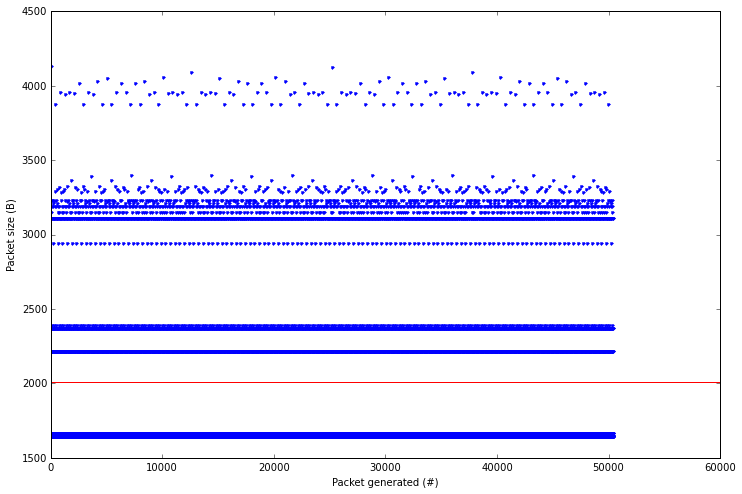

In [57]:
plot(n, total + percent * (delta_incl + range_incl + write_incl), "b.")
xlabel("Packet generated (#)")
ylabel("Packet size (B)")
axhline(2011, 0, 1, color="r")

In [58]:
apid_gen = {}

apid_gen[2] = 1 / 45.

In [59]:
apid = eng[APID[5]]

r = [(apid.y[i-1] - apid.y[j+1]) / (apid.t[i-1] - apid.t[j+1]).total_seconds() \
     for i in range(1, len(apid.t)-1) \
     if apid.y[i+1] < apid.y[i] > apid.y[i-1] \
     and 1800 > apid.y[i] > 200 \
     for j in range(i-2, 0, -1) \
     if apid.y[j+1] > apid.y[j] == 0 \
     and 60*60 < (apid.t[i-1] - apid.t[j+1]).total_seconds() <= 90*60]

apid_gen[5] = average(r)

In [60]:
apid = eng[APID["dump"]]

r = [(apid.y[i-1] - apid.y[j+1]) / (apid.t[i-1] - apid.t[j+1]).total_seconds() \
     for i in range(1, len(apid.t)-1) \
     if apid.y[i+1] < apid.y[i] > apid.y[i-1] \
     and apid.y[i] > 1000 \
     for j in range(i-2, 0, -1) \
     if apid.y[j+1] > apid.y[j] == 0 \
     and 60*60 < (apid.t[i-1] - apid.t[j+1]).total_seconds() <= 90*60]

apid_gen["dump"] = average(r)

In [61]:
apid_queue = {
    2: 789512,
    5: 81008,
    "dump": 1045001
}

print "||".join(["",
                 "APID",
                 "Packet (bytes)",
                 "Packet rate (1/s)",
                 "100-min Orbit (B)",
                 "Queue (B)",
                 "Utilized (%%)",
                 ""]) % r

for key in APID:
    print "|".join(["",
                    "%s",
                    "%d",
                    "%.3f",
                    "%d",
                    "%d",
                    "%4.2f",
                    ""]) % (key,
                           apid_packet[key],
                           apid_gen[key],
                           apid_packet[key] *\
                           floor(100 * MINUTE.total_seconds() * apid_gen[key]),
                           apid_queue[key],
                           100 * apid_packet[key] *\
                           floor(100 * MINUTE.total_seconds() * apid_gen[key]) /\
                           apid_queue[key])
print

||APID||Packet (bytes)||Packet rate (1/s)||100-min Orbit (B)||Queue (B)||Utilized (%)||
|2|1787|0.022|237671|789512|30.10|
|5|283|0.212|359693|81008|444.02|
|dump|379|0.572|1299970|1045001|124.40|



In [69]:
Rs = DAC_FREQ * (SYMBOL_RATE_INC - 0.5) / 2**32
P = 36

image_header = (SKYBOX_PREAMBLE + IMAGE_HEADER + 12 * len(CAN_MNEMONICS)) * BYTE
frame_size = 32 +\
    (2560 + 32) * (2160 + 32) * 12 +\
    32
crc = 4 * BYTE

packet_size = image_header + frame_size + crc
#packet_size = (packet_size / 183 + 1) * 188
    
for i, L in enumerate(FRAME_LENGTH):
    print "||".join(["",
                     "%d",
                     "Bit rate (Mb/s)",
                     "[Raw] frame rate (Hz)",
                     "10-min pass (#)",
                     ""]) % L
    for j in MODULATION:
        M = MODULATION[j]
        
        eta_mod = log(M) / log(2)

        S = L / eta_mod / 90
        
        eta_frame = 90 * S / (90 * (S + 1) + P * floor((S - 1) / 16))
        
        for k in CODE_RATE:
            eta_code = (CODE_RATE[k][i] - 80.) / L
            
            eta = eta_mod * eta_frame * eta_code
            
            if 0 < eta:
                print "|%s (%d/%d)|%4.2f|%4.2f|%d|" % (j, k[0], k[1],
                                                    eta * Rs / MEGA,
                                                    eta * Rs / packet_size,
                                                    floor(10 * MINUTE.total_seconds() * \
                                                          eta * Rs / packet_size))
    
    print

||64800||Bit rate (Mb/s)||[Raw] frame rate(Hz)||10-min pass (#)||
|QPSK (1/4)|21.54|0.32|189|
|QPSK (1/3)|28.84|0.42|253|
|QPSK (2/5)|34.68|0.51|305|
|QPSK (1/2)|43.44|0.64|382|
|QPSK (3/5)|52.20|0.77|459|
|QPSK (2/3)|58.09|0.85|511|
|QPSK (3/4)|65.34|0.96|574|
|QPSK (4/5)|69.72|1.02|613|
|QPSK (5/6)|72.69|1.07|639|
|QPSK (8/9)|77.60|1.14|682|
|QPSK (9/10)|78.57|1.15|691|
|8-PSK (1/4)|32.30|0.47|284|
|8-PSK (1/3)|43.24|0.63|380|
|8-PSK (2/5)|52.00|0.76|457|
|8-PSK (1/2)|65.14|0.96|573|
|8-PSK (3/5)|78.28|1.15|688|
|8-PSK (2/3)|87.10|1.28|766|
|8-PSK (3/4)|97.99|1.44|862|
|8-PSK (4/5)|104.56|1.53|920|
|8-PSK (5/6)|109.00|1.60|959|
|8-PSK (8/9)|116.37|1.71|1023|
|8-PSK (9/10)|117.83|1.73|1036|
|16-APSK (1/4)|42.96|0.63|377|
|16-APSK (1/3)|57.52|0.84|506|
|16-APSK (2/5)|69.17|1.01|608|
|16-APSK (1/2)|86.65|1.27|762|
|16-APSK (3/5)|104.12|1.53|916|
|16-APSK (2/3)|115.86|1.70|1019|
|16-APSK (3/4)|130.33|1.91|1146|
|16-APSK (4/5)|139.07|2.04|1223|
|16-APSK (5/6)|144.98|2.13|1275|
|16-APSK (8